In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob
import pandas as pd
import os

# Define the path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Dictionary to store counts
class_counts = {}

# Traverse each main class folder
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        total_images = 0
        # Traverse each subtype (subfolder)
        for subtype_folder in os.listdir(main_class_path):
            subtype_path = os.path.join(main_class_path, subtype_folder)
            if os.path.isdir(subtype_path):
                # Count images in the subtype folder
                num_images = len(glob(subtype_path + '/*'))
                total_images += num_images
                print(f"{main_class_folder} - {subtype_folder}: {num_images} images")
        class_counts[main_class_folder] = total_images

# Display the total number of images per main class
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Total Number of Images'])
print("\nTotal images per main class:")
print(class_counts_df)


Igneous - Granite: 101 images
Igneous - Basalt: 86 images
Metamorphic - Marble: 387 images
Metamorphic - Quartzite: 476 images
Sedimentary - Limestone: 338 images
Sedimentary - Sandstone: 325 images
Sedimentary - Coal: 369 images

Total images per main class:
         Class  Total Number of Images
0      Igneous                     187
1  Metamorphic                     863
2  Sedimentary                    1032


In [ ]:
# Augmentation function with RGBA conversion
def augment_image(image_path, save_path, num_augments=5):
    with Image.open(image_path) as img:
        # Convert RGBA to RGB if needed
        if img.mode == 'RGBA':
            img = img.convert('RGB')

        for i in range(num_augments):
            augmented = img.copy()
            # Random augmentations
            if random.choice([True, False]):
                augmented = ImageOps.mirror(augmented)
            if random.choice([True, False]):
                augmented = augmented.rotate(random.randint(-30, 30))
            if random.choice([True, False]):
                factor = random.uniform(0.8, 1.2)
                augmented = ImageEnhance.Brightness(augmented).enhance(factor)
            # Save augmented image
            new_filename = f"{os.path.basename(image_path).split('.')[0]}_aug{i}.jpg"
            augmented.save(os.path.join(save_path, new_filename), 'JPEG')


In [ ]:
def augment_image(image_path, save_path, num_augments=5):
    try:
        with Image.open(image_path) as img:
            # Ensure image mode compatibility for JPEG
            if img.mode == 'RGBA':
                img = img.convert('RGB')

            for i in range(num_augments):
                augmented = img.copy()
                # Random augmentations
                if random.choice([True, False]):
                    augmented = ImageOps.mirror(augmented)
                if random.choice([True, False]):
                    augmented = augmented.rotate(random.randint(-30, 30))
                if random.choice([True, False]):
                    factor = random.uniform(0.8, 1.2)
                    augmented = ImageEnhance.Brightness(augmented).enhance(factor)

                # Save augmented image as JPEG
                new_filename = f"{os.path.basename(image_path).split('.')[0]}_aug{i}.jpg"
                augmented.save(os.path.join(save_path, new_filename), 'JPEG')
    except Exception as e:
        print(f"Error processing {image_path}: {e}")


In [ ]:
# Define target number of images
min_target = 1000

# Balancing the dataset
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        images = [f for f in os.listdir(main_class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        current_count = len(images)
        print(f"Class: {main_class_folder}, Images: {current_count}")

        # Perform augmentation if needed
        if current_count < min_target:
            images_to_augment = random.choices(images, k=min_target - current_count)
            for image_file in images_to_augment:
                image_path = os.path.join(main_class_path, image_file)
                augment_image(image_path, main_class_path, num_augments=1)


Class: Igneous, Images: 1000
Class: Metamorphic, Images: 1000
Class: Sedimentary, Images: 1000


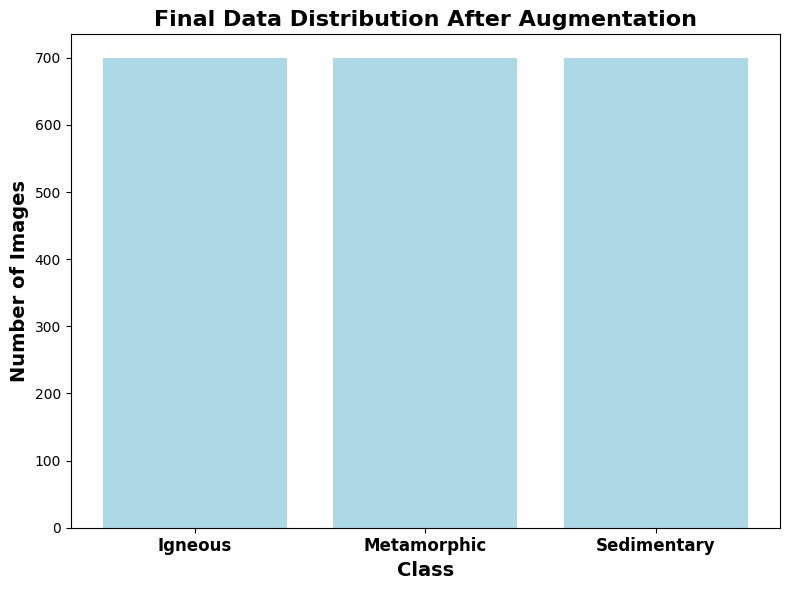

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of images in each class
data_path = '/content/drive/MyDrive/ProcessedDataset/train'  # Adjust for train/val/test if needed
class_counts = {}

for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        total_images = len([f for f in os.listdir(main_class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[main_class_folder] = total_images

# Convert to DataFrame for plotting
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Images'])

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts_df['Class'], class_counts_df['Number of Images'], color='lightblue')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.title('Final Data Distribution After Augmentation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image

# Path to processed dataset
data_path = '/content/drive/MyDrive/ProcessedDataset'

# Verify preprocessing
def verify_preprocessing(data_path, target_size=(224, 224)):
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(data_path, split)
        for class_folder in os.listdir(split_path):
            class_path = os.path.join(split_path, class_folder)
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        # Check image size and mode
                        if img.size != target_size:
                            print(f"Incorrect size: {image_path} - {img.size}")
                        if img.mode != 'RGB':
                            print(f"Incorrect mode: {image_path} - {img.mode}")
                except Exception as e:
                    print(f"Error with image: {image_path} - {e}")

# Run the verification
verify_preprocessing(data_path)
print("Preprocessing verification complete.")


Preprocessing verification complete.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths to train, validation, and test folders
train_dir = '/content/drive/MyDrive/ProcessedDataset/train'
val_dir = '/content/drive/MyDrive/ProcessedDataset/val'
test_dir = '/content/drive/MyDrive/ProcessedDataset/test'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)


Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [ ]:
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model weights

tl_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tl_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train Baseline CNN
print("Training Baseline CNN...")
history_baseline = baseline_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Train Transfer Learning Model
print("Training Transfer Learning Model...")
history_tl = tl_model.fit(train_generator, validation_data=val_generator, epochs=10)


Training Baseline CNN...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.4605 - loss: 1.1892 - val_accuracy: 0.6533 - val_loss: 0.8061
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.6327 - loss: 0.8280 - val_accuracy: 0.6733 - val_loss: 0.7397
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.7123 - loss: 0.6722 - val_accuracy: 0.7022 - val_loss: 0.7585
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.7335 - loss: 0.6135 - val_accuracy: 0.6956 - val_loss: 0.8089
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.7934 - loss: 0.5050 - val_accuracy: 0.7111 - val_loss: 0.8906
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.8236 - loss: 0.4417 - val_accuracy: 0.6911 - val_loss: 0.9967
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.8637 - loss: 0.3640 - val_accuracy: 0.6778 - val_loss: 1.0618
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.9008 - loss: 0.2728 - val_accuracy: 0.7244 - val_loss: 1.

In [ ]:
# Evaluate models
baseline_loss, baseline_acc = baseline_model.evaluate(test_generator)
tl_loss, tl_acc = tl_model.evaluate(test_generator)

print(f"Baseline CNN Accuracy: {baseline_acc * 100:.2f}%")
print(f"Transfer Learning Accuracy: {tl_acc * 100:.2f}%")


15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 925ms/step - accuracy: 0.7456 - loss: 1.2184
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8608 - loss: 0.3751
Baseline CNN Accuracy: 71.33%
Transfer Learning Accuracy: 84.22%


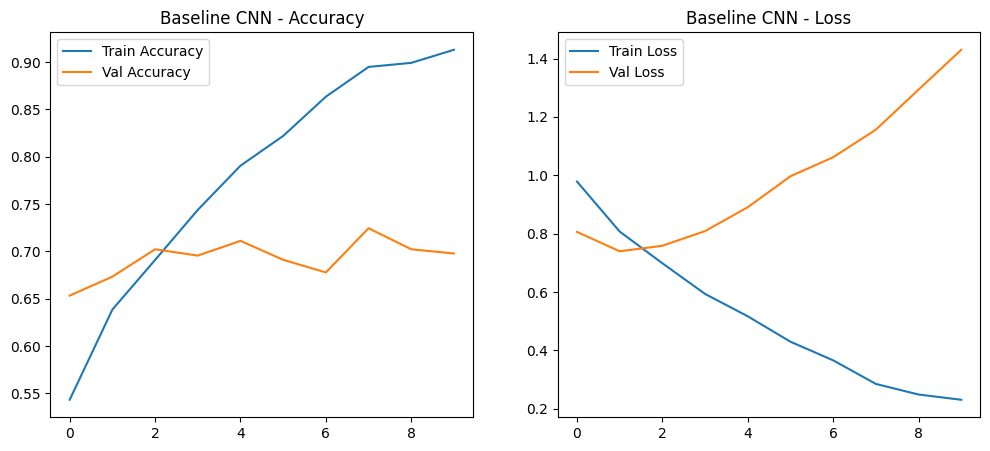

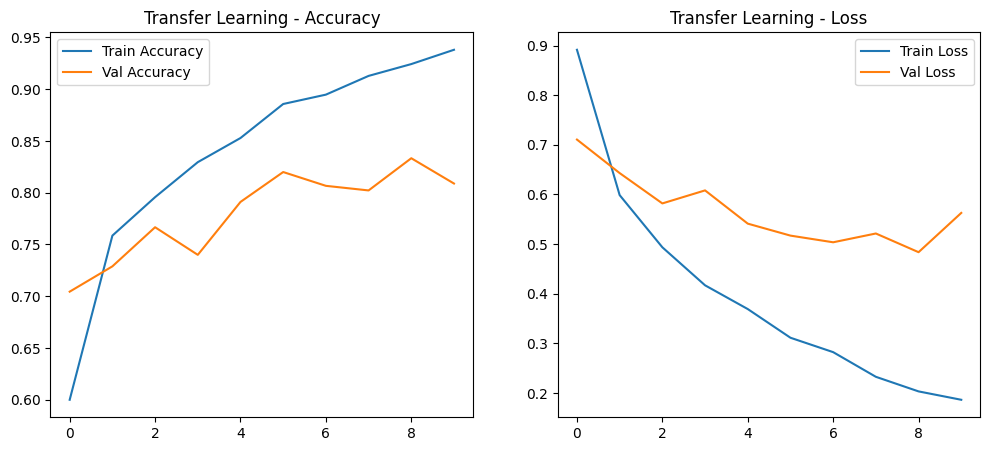

In [ ]:
def plot_training_curves(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.show()

plot_training_curves(history_baseline, "Baseline CNN")
plot_training_curves(history_tl, "Transfer Learning")


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


<Figure size 800x600 with 0 Axes>

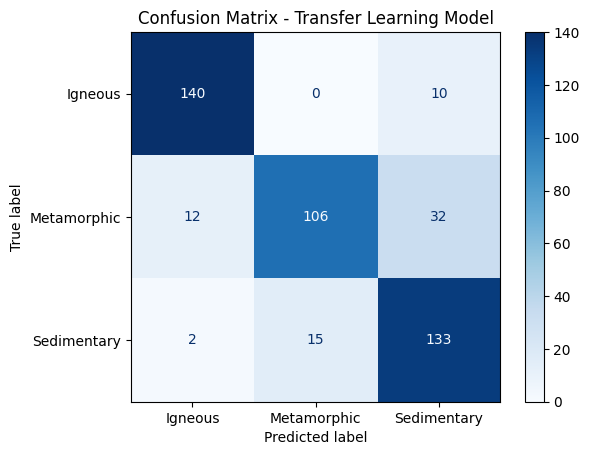

In [ ]:
# Predictions for the test set
y_true = test_generator.classes
y_pred = np.argmax(tl_model.predict(test_generator), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Transfer Learning Model")
plt.show()
